# Finding the optocentre

In [ ]:
def SearchStars(image, fwhm=8., threshold=4, showPlot=False):

    medianAbsoluteDeviation = mad_std(image)
    daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold*medianAbsoluteDeviation)
    sources = daofind(image)

    if (showPlot):
        plt.subplot(projection=wcs)
        plt.imshow(image)
        plt.scatter(sources['xcentroid'], sources['ycentroid'], alpha=0.5, color="orange")
        plt.xlabel("Right Ascension")
        plt.ylabel("Declination")
        plt.gca().invert_yaxis()

    return sources

In [ ]:
image = comets.GetImage(bDataPaths[0])

filter = "V"

wcs = WCS(fits.open(rootPath + "Data/wcs/tsuchinshanWCS.fits")[0].header)

sources = SearchStars(image, fwhm=8, threshold=16, showPlot=False)

# Calibrated manually
match filter:
    case "V":
        maxPeak = 2400
        minPeak = 1800

    case "R":
        maxPeak = 3000
        minPeak = 2200

    case "B":
        maxPeak = 1350
        minPeak = 1200

removeIndices = []

for i in range(len(sources)):
    if sources[i]["peak"] > maxPeak or sources[i]["peak"] < minPeak:
        removeIndices.append(i)

sources.remove_rows(removeIndices)
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
3,198.77934838529254,26.079089367907486,0.5603679216458507,-0.3843235270251952,0.08090343203743051,121,0.0,1305.0,8.955895872049123,-2.3802725887588365
5,619.4987581157723,53.73213777455939,0.5625962718186696,-0.26970792362793955,0.014965365395855659,121,0.0,1228.0,6.412730577883629,-2.017607485027627
26,129.29113208098659,661.8748996875181,0.6744017837558384,-0.35267552136278263,-0.08588429867335538,121,0.0,1350.0,9.233097240896903,-2.4133685236905067
29,1732.7815609010593,701.8181967865726,0.5876689814239698,-0.25668319387543265,-0.1304137827750771,121,0.0,1245.0,6.747666656412265,-2.0728840493242213
32,1003.9845399620356,734.2756739469345,0.6222843413620585,-0.13008923812373524,-0.13027714691934622,121,0.0,1255.0,6.8754748061381,-2.093256737552302
40,983.6465338908605,984.8234558885222,0.529941727417366,-0.05735330670887547,-0.33446109427238974,121,0.0,1249.0,4.876092235753691,-1.7201797802555232
42,1543.5611915025104,998.4868113537524,0.6037938804901317,-0.012205381394678617,-0.10566466664369309,121,0.0,1245.0,6.635080408546249,-2.054615475791767
44,17.033050111907038,1069.6246002369242,0.7064480417465129,-0.3800827251360968,-0.07779326843310111,121,0.0,1302.0,7.500268911440801,-2.1876920866996583
71,345.090151446188,1786.9847903106631,0.611346092125518,-0.40390045138225966,-0.03917983940391444,121,0.0,1231.0,6.136860435769733,-1.9698656167220148


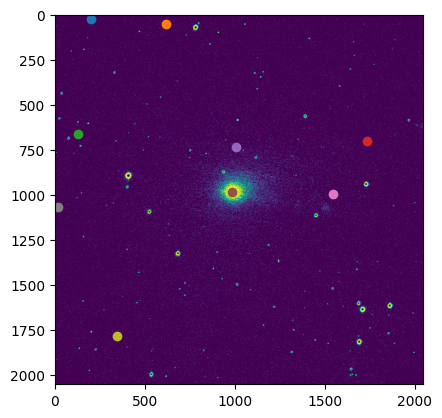

In [ ]:
# V
# upperThreshold = 1600
# lowerThreshold = 1150

# R
# upperThreshold = 1600
# lowerThreshold = 1250

# B
# upperThreshold = 1200
# lowerThreshold = 1040

match filter:
    case "V":
        upperThreshold = 1600
        lowerThreshold = 1150

    case "R":
        upperThreshold = 1200
        lowerThreshold = 1040

    case "B"
        upperThreshold = 1200
        lowerThreshold = 1040

thresholdIndices = np.where((image > lowerThreshold)  & (image < upperThreshold), 1, 0)

plt.imshow(thresholdIndices)

for source in sources:
    plt.scatter(source["xcentroid"], source["ycentroid"])

In [ ]:
p0 = np.array([1000, 930, 980, 2, 2])
centre = ctk.FindCometCentre(vReducedDataPaths[0], "V", dayInt, p0=p0, method="gaussian", maxfev=10000, showPlot=True, useBackground=False)
print(centre)

def Gaussian_2d(values,A,mu_x,mu_y,sigma_x,sigma_y):
    x, y = values
    G = A*np.exp(-(x-mu_x)**2/(2*sigma_x**2) - (y-mu_y)**2/(2*sigma_y**2) )
    return np.ravel(G)

image = ctk.GetImage(vReducedDataPaths[0])
#plt.imshow(image)

x = np.linspace(0, len(image[0]), len(image[0]))
y = np.linspace(0, len(image[:,0]), len(image[:,0]))
x, y = np.meshgrid(x, y)
testGaussian = Gaussian_2d((x,y),*p0).reshape(len(image[:,0]), len(image[0]))
plt.contour(x, y, testGaussian, 10, colors="red")

In [ ]:
r = 50
brightestCounts = 0
cometId = None

# Add pixels around source in radius
for source in sources:

    # Loop through and add pixels in box size r
    x = round(source["xcentroid"])
    y = round(source["ycentroid"])

    counts = np.sum(image[x - r : x + r, y - r : y + r])

    if counts > brightestCounts:
        brightestCounts = counts
        cometId = source["id"]

print(cometId)

40
